# <center>Stock Market Prediction And Forecasting Using Stacked LSTM</center>
<img src="STOCK_MARKET.jpg">

### Importing important pagkages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Importing Dataset

In [3]:
data = pd.read_csv("STOCK_MARKET.csv")

### Viewing Dataset

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df1=data.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

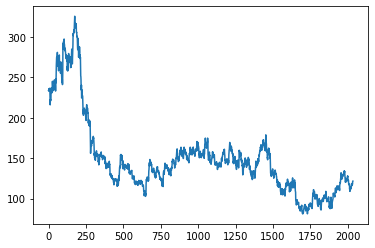

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

### splitting dataset into train and test split

In [8]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

### convert an array of values into a dataset matrix

In [9]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

### Reshaping the input & creating Stacked LSTM model

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model
import pip
pip.main(['install','tensorflow'])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=ff083eb93f3403361079e95e4ab13d77802eaa8d52e03245f558f5f93fb1ce2e
  Stored in directory: /home/jovyan/.cache/pip/wheels/22/4c/94/0583f60c9c5b6024ed64f290cb2d43b06bb4f75577dc3c93a7
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=cf20d2886ea5235504a30649e3a4264868b59abd79a8f80a60536560054d427f
  Stored in directory: /home/jovyan/.cache/pip/wheels/93/2a/eb/e58dbcbc963549ee4f065ff80a59f274cc7210b6eab962acdc
  Created wheel for wrapt: filename=wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl size=69762 sha256=09c382486a0dd809c859dcd44bf4bec1fa11d6dddf695a70af7a5a751b7ea238
  Stored in directory: /home/jovyan/.cache/pip/wheels/32/42/7f/23cae9ff6ef66798d00dc5d659088e57dbba01566f6c60db63
Successfully built clang termcolor wrapt


In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Model Fitting

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 15s 537ms/step - loss: 0.0286 - val_loss: 0.0033
Epoch 2/100
20/20 [==============================] - 10s 484ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 3/100
20/20 [==============================] - 10s 480ms/step - loss: 0.0018 - val_loss: 8.5805e-04
Epoch 4/100
20/20 [==============================] - 10s 484ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 10s 483ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 10s 479ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 9s 473ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 9s 470ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 9s 479ms/step - loss: 0.0012 - val_loss: 8.0583e-04
Epoch 10/100
20/20 [==============================] - 10s 484ms/step - loss: 

In [17]:
import tensorflow as tf

### Prediction and performance metrics

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

### Transform back to original form

In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.2267176419147

### Test Data RMSE

In [21]:
math.sqrt(mean_squared_error(ytest,test_predict))

115.61574022214118

## Plot

### Shifting train predictions for plotting

In [22]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

### Shifting test predictions for plotting

In [23]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

### Plot baseline and predictions

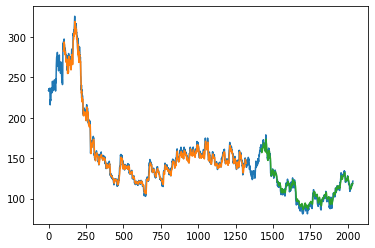

In [24]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

713

In [54]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.16214971]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [67]:
day_new=np.arange(1,164)
day_pred=np.arange(144,174)

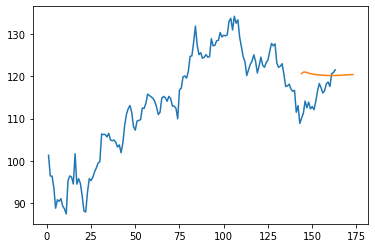

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[1872:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

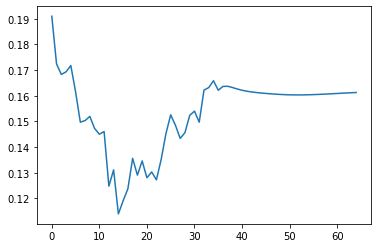

In [69]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

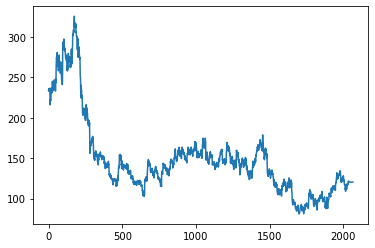

In [70]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)